# Importing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import savgol_filter
from matplotlib.pyplot import plot
from pathlib import Path
from scipy.stats.mstats import gmean
from scipy.stats import wilcoxon, ttest_rel
from scipy.stats.mstats import gmean, hmean

# Utility functions

In [2]:
N_SP1_TTS_path = Path('/home/km/Desktop/JCIM/Results/N_SP1_TTS')

In [3]:
def concat_tables(path, table_name='test'):
    table_full_name = 'test' + '_initial_stats.csv'
    tables_to_conc = []
    for it in range(0, 10):
        it_tb = pd.read_csv(path / str(it) / table_full_name)
        tables_to_conc.append(it_tb)
    concat = pd.concat(tables_to_conc)
    return concat

In [4]:
def from_conc_array(concat_t, metric, dim_2=10):
    values_np = np.array(concat_t[metric])
    dim_1 = int(values_np.shape[0] / dim_2)
    np_for_plot = np.reshape(values_np, (dim_2, dim_1))
    return np_for_plot

In [5]:
N_SP1_TTS_test_all = concat_tables(N_SP1_TTS_path)

In [6]:
N_SP1_TTS_test_all

,Unnamed: 0,AUC lower estimate,AUC,AUC upper estimate,accuracy,F1,MCC
0,0,0.394294,0.538899,0.683504,0.476923,0.645833,0.000000
1,1,0.584626,0.709677,0.834729,0.615385,0.545455,0.226827
2,2,0.650490,0.767552,0.884614,0.723077,0.689655,0.445233
3,3,0.598465,0.722011,0.845558,0.600000,0.518519,0.195235
4,4,0.575597,0.703985,0.832373,0.646154,0.656716,0.299336
...,...,...,...,...,...,...,...
898,898,0.730904,0.835389,0.939873,0.753846,0.757576,0.513309
899,899,0.726559,0.826850,0.927141,0.692308,0.722222,0.411430
900,900,0.759404,0.851992,0.944581,0.769231,0.761905,0.538389
901,901,0.711241,0.815939,0.920638,0.738462,0.753623,0.492352


In [7]:
N_SP1_TTS_test_test_MCC = from_conc_array(N_SP1_TTS_test_all, 'MCC')

In [8]:
# np.mean(N_SP1_TTS_test_test_MCC, axis=0) -2*np.var(N_SP1_TTS_test_test_MCC, axis=0)

In [9]:
argmax_test = np.argmax(np.mean(N_SP1_TTS_test_test_MCC, axis=0))



In [10]:
np.mean(N_SP1_TTS_test_test_MCC, axis=0)[argmax_test]

0.538606991273479

In [11]:
N_SP1_TTS_test_test_MCC.T[argmax_test, :]

array([0.61736363, 0.45743323, 0.72322307, 0.66064758, 0.54719401,
       0.57777625, 0.39620547, 0.51335866, 0.61736363, 0.27550437])

In [12]:
np.mean(N_SP1_TTS_test_test_MCC, axis=1)[-1]

0.4354398555829946

In [13]:
N_SP1_TTS_test_test_MCC.shape

(10, 903)

In [15]:
ttest_rel(N_SP1_TTS_test_test_MCC.T[-1, :], N_SP1_TTS_test_test_MCC.T[argmax_test, :])

Ttest_relResult(statistic=-1.2145739496922485, pvalue=0.25543315106781306)

In [16]:
wilcoxon(N_SP1_TTS_test_test_MCC.T[-1, :], N_SP1_TTS_test_test_MCC.T[argmax_test, :])

WilcoxonResult(statistic=16.0, pvalue=0.275390625)

In [ ]:
# wilcoxon(N_SP1_TTS_test_test_MCC[343:344,][0], N_SP1_TTS_test_test_MCC[629:630,][0])

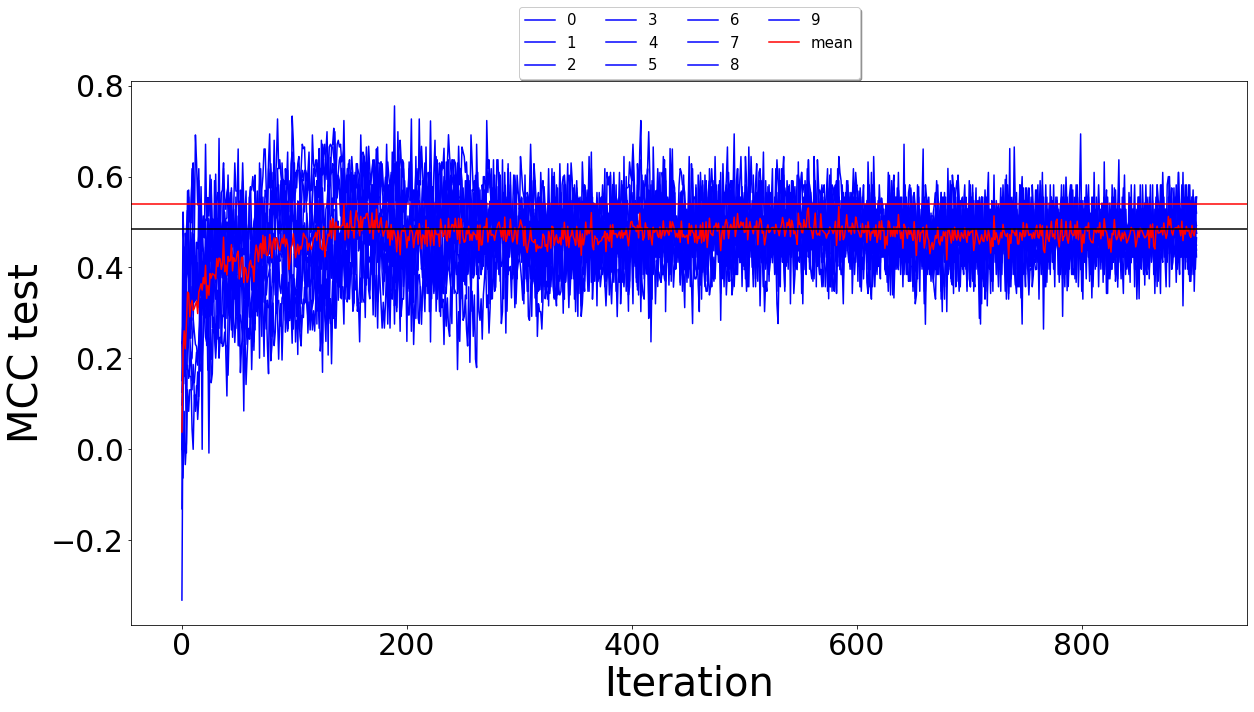

In [17]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('N_SP1_TTS, test performance')

ax.plot(N_SP1_TTS_test_test_MCC.T, label=list(range(0, 10)), color='blue')
ax.plot(np.mean(N_SP1_TTS_test_test_MCC.T, axis=1), label='mean', color='red')
# ax.legend(fontsize=30)
ax.axhline(np.mean(N_SP1_TTS_test_test_MCC.T, axis=1).max(), color='red')
ax.axhline(np.mean(N_SP1_TTS_test_test_MCC.T, axis=1)[-1], color='black')

ax.legend(loc='upper center', bbox_to_anchor=(0.5, 1.15),
          ncol=4, fancybox=True, shadow=True, fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_ylabel('MCC test')
ax.yaxis.label.set_size(40)
ax.set_xlabel('Iteration')
ax.xaxis.label.set_size(40)
plt.show()